In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LogisticRegression import LogisticRegression
from MultilayerPerceptron import MultilayerPerceptron
from plot_confusion_matrix import plot_confusion_matrix
from DecisionTree import DecisionTree
metrics = DecisionTree()

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [4]:
LR_Model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
LR_Model.fit(X_train, y_train)
y_pred_lr = LR_Model.predict(X_test)

logistic_regression_confusuion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion matrix: \n{logistic_regression_confusuion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(logistic_regression_confusuion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[ 2 53]
 [ 0 99]]
Accuracy: 0.6558441558441559
Precision: 1.0
Recall: 0.03636363636363636
F1: 0.07017543859649122


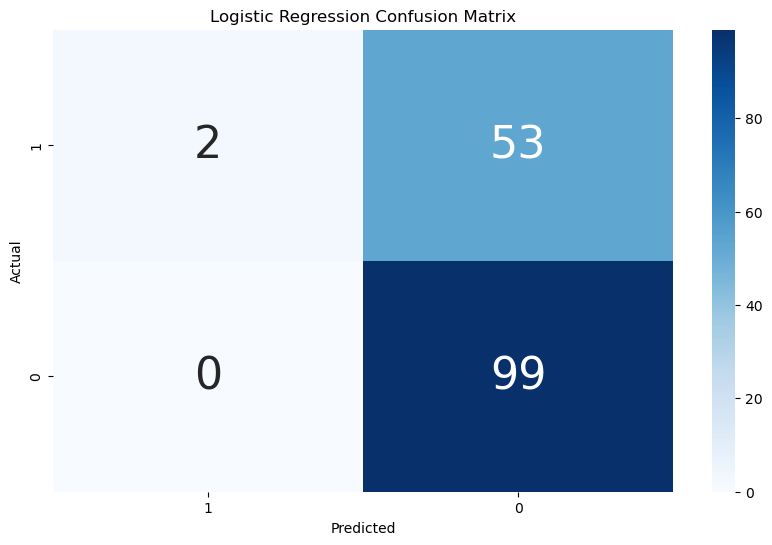

In [5]:
plot_confusion_matrix(logistic_regression_confusuion_matrix, title='Logistic Regression Confusion Matrix')

In [6]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

Epoch 0, Training Loss: 6.4045491218566895 - Training Accuracy: 0.653094470500946
Epoch 100, Training Loss: 0.5754709839820862 - Training Accuracy: 0.7052116990089417
Epoch 200, Training Loss: 0.5404295921325684 - Training Accuracy: 0.7394136786460876
Epoch 300, Training Loss: 0.5108344554901123 - Training Accuracy: 0.7524430155754089
Epoch 400, Training Loss: 0.48381614685058594 - Training Accuracy: 0.767100989818573
Epoch 500, Training Loss: 0.466301828622818 - Training Accuracy: 0.7833876013755798
Epoch 600, Training Loss: 0.4613865613937378 - Training Accuracy: 0.776872992515564
Epoch 700, Training Loss: 0.4388456642627716 - Training Accuracy: 0.8013029098510742
Epoch 800, Training Loss: 0.434314489364624 - Training Accuracy: 0.7964169383049011
Epoch 900, Training Loss: 0.42905348539352417 - Training Accuracy: 0.8013029098510742


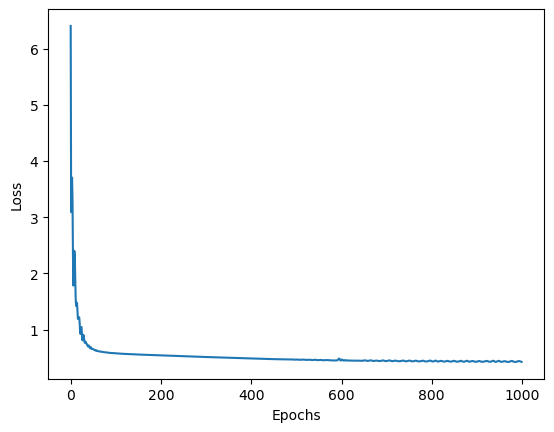

In [7]:
mlp = MultilayerPerceptron(input_size=X_train_tensor.shape[1], hidden_size=X_train_tensor.shape[1]*2, output_size=2, activation="relu")
mlp.fit(X_train_tensor, y_train_tensor, epochs=1000)

In [8]:
y_pred_mlp = mlp.predict(X_test_tensor)
y_pred_mlp = torch.argmax(y_pred_mlp, dim=1)

mlp_confusion_matrix = metrics.confusion_matrix(y_test_tensor, y_pred_mlp)
print(f"Confusion matrix: \n{mlp_confusion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(mlp_confusion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[33 22]
 [10 89]]
Accuracy: 0.7922077922077922
Precision: 0.7674418604651163
Recall: 0.6
F1: 0.673469387755102


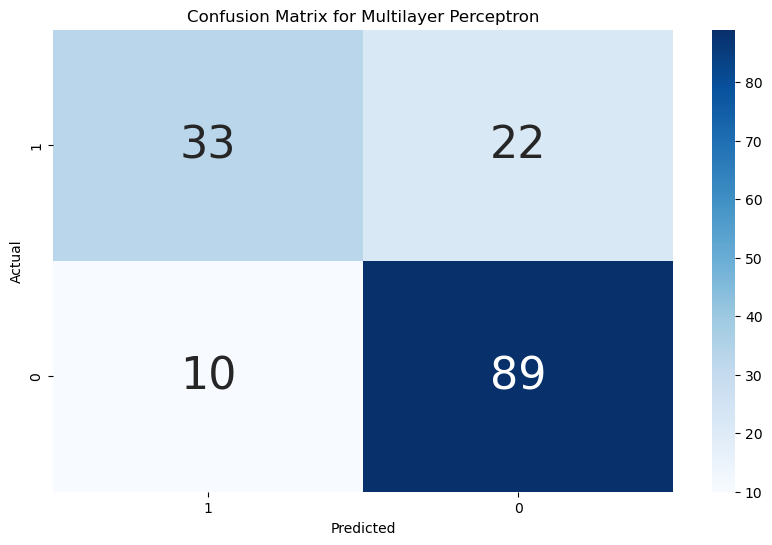

In [9]:
plot_confusion_matrix(mlp_confusion_matrix, "Confusion Matrix for Multilayer Perceptron")